Multiple Linear Regression

importing needed packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

Downloading data

To download the data,we will use !wget to download it from IBM Object Storage

In [19]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-03-12 11:32:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2021-03-12 11:32:34 (951 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Understanding the Data

FuelConsumption.csv

We have downloaded a fuel consumption dataset,FuelConsumption.csv which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions
for new light duty vehicles for retail sale in Canada

MODEL YEAR eg:2004

MAKE e.g. Acura

MODEL e.g ILX

VEHICLE CLASS e.g SUV

ENGINE SIZE e.g 4.7

CYLINDERS e.g 6

TRANSMISSION e.g A6

FUELTYPE e.g z

FUEL CONSUMPTION in CITY(L/100 KM) e.g. 9.9

FUEL CONSUMPTION in HWY(L/100KM) e.g. 8.9

FUEL CONSUMPTION COMB(L/100KM) e.g.9.2

CO2 EMISSIONS(g/km) e.g 182--> low --> 0

Reading the data in

In [20]:
df = pd.read_csv("FuelConsumption.csv")

#Take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression

In [21]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Lets plot Emission values with respect to Engine size

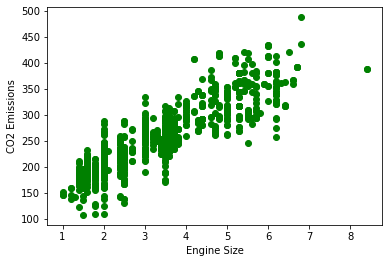

In [27]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'green')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

Creating training and test data

Train/Test split involves splitting the dataset into training and testing sets respectively,which are mutally exclusive.After which you train with the 
training set and test with the test set.This will provide a more accurate evaluation on out of sample accuracy because the testing dataset is nmot part of the
dataset that have been used to train the data.This is more realistic for real world problems.

This means that we know the outcome of each datapoint in this dataset,making it great to test with and since this data has not been used to train the model
.The model has no knowledge of the outcome of these data points.So in essence,it's truly an out of sample testing.

In [28]:
msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]


In [29]:
train.head()
train.shape

(841, 6)

In [30]:
test.head()
test.shape

(226, 6)

Train data distribution

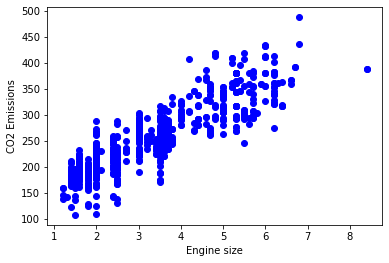

In [31]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")
plt.show()

Multiple Regression Model

In reality, there are mutiple variables that predict the CO2 emissions.When more than one independent variable present,the process it called mutiple linear
regression.For example, predicting co2 emissions using FEULEMISSIONS_COMB,ENGINE_SIZE,CYLINDERS of cars.The good thing here is that Multiple linear regression 
is the extension of simple linear regression model.

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print("The coefficents:",regr.coef_)
print("The intercept:",regr.intercept_)

The coefficents: [[10.02750423 10.65005724  7.09909922]]
The intercept: [63.41006838]


As mentioned before, Coefficient and Intercept are the parameters of the fit line.Given that it is a multiple linear regression with three parameters and,
knowing that parameters are the  coefficients and the intercept of hyperplane,sklearn can estimate them from our data.Scikit-learn uses plain ordinary least squares method to solve this problem.

Ordinary Least Squares(OLS)

OLS is a method for estimating the unknown parameters in a linear regression model.OLS chooses the parameters of a linear function of a set of varaibles
by minimizing the sum of the squares of differences between the target dependent variables and those predicted by the linear function.In other words
 it tries to minimize the sum of the squared errors(SSE) or Mean of the squared error(MSE) between the target variable (y) and our predicted output (y_) over all samples in the dataset

OLS can find the best parameters using of the following methods.


Prediction

In [33]:
y_hat = regr.predict(test[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y =np.asanyarray(test[["CO2EMISSIONS"]])
print("Residual sum of squares: %.2f" %np.mean((y - y_hat) ** 2))

# Explained varaince score

print('Variance score: %.2f' %regr.score(x,y))



Residual sum of squares: 608.96
Variance score: 0.78
